# REPORT 2 

# CAND NO : 282678

# Summary 

In the dynamic realm of wearable technology, Trivisio has achieved a significant advancement with the introduction of the Colibri Wireless unit. This latest addition to their product lineup transcends the status of a mere inertial measurement unit; it signifies a firm commitment to pioneering innovations in the field of physical activity monitoring. Equipped with a distinctive array of sensors capable of measuring acceleration, angular rate, magnetic field strength, as well as additional parameters like temperature and orientation, the Colibri Wireless unit emerges as a formidable competitor in the market, distinctly setting itself apart from products such as the Wireless InertiaCube3 by InterSense, MTw Awinda by Xsens, T40s by Vicon, and the OptoTrak 3020 by Optotrak Certus.

The crux of this report revolves around a comprehensive analysis rooted in meticulously gathered data from nine participants. These individuals, each outfitted with three IMUs and a heart-rate monitor, engaged in a series of 12 diverse physical activities, with a subset partaking in an additional six tasks. This meticulous data collection process has yielded an extensive wealth of information, encapsulating intricate physiological responses across a diverse spectrum of activities.

The trajectory of this report navigates through an exhaustive exploratory data analysis, followed by the development and evaluation of a multi-attribute predictive model. The ultimate objective is to extract actionable insights that could potentially steer future enhancements in both the software and hardware components of the Colibri Wireless unit.

At the core of the study lies a hypothesis centered on the Colibri Wireless unit's capacity to predict the type of physical activity undertaken, drawing from an array of factors, including heart rate, individual physical attributes, and nuanced IMU readings. The potential applications of such predictive capabilities are vast, spanning from automated activity identification to tailored fitness recommendations.

The report is meticulously crafted with a dual focus: technical precision for the knowledgeable, and lucid, accessible explanations for those less acquainted with the intricacies of data science. It delves deeply into detailed data analysis, the intricacies of predictive modeling, and culminates in strategic recommendations that could pave new avenues for the Colibri Wireless unit.

Through this report, Trivisio aims not only to highlight the exceptional features of their product but also to explore its potential to create a meaningful impact in the domain of physical activity monitoring.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import io

In [2]:
dfColumns = ['timestamp (s)', 'activity ID', 'heart rate (bpm)', 'hand temperature', 'hand 3D acceleration scale: ±16g, resolution: 13-bit (1)',
             'hand 3D acceleration scale: ±16g, resolution: 13-bit (2)', 'hand 3D acceleration scale: ±16g, resolution: 13-bit (3)',
             'hand 3D acceleration scale: ±6g, resolution: 13-bit (1)', 'hand 3D acceleration scale: ±6g, resolution: 13-bit (2)',
             'hand 3D acceleration scale: ±6g, resolution: 13-bit (3)', 'hand 3D gyroscope (1)', 'hand 3D gyroscope (2)', 'hand 3D gyroscope (3)',
             'hand 3D magnetometer (1)', 'hand 3D magnetometer (2)', 'hand 3D magnetometer (3)', 'hand orientation (invalid) (1)', 'hand orientation (invalid) (2)',
             'hand orientation (invalid) (3)', 'hand orientation (invalid) (4)', 'chest temperature', 'chest 3D acceleration scale: ±16g, resolution: 13-bit (1)',
             'chest 3D acceleration scale: ±16g, resolution: 13-bit (2)', 'chest 3D acceleration scale: ±16g, resolution: 13-bit (3)',
             'chest 3D acceleration scale: ±6g, resolution: 13-bit (1)', 'chest 3D acceleration scale: ±6g, resolution: 13-bit (2)',
             'chest 3D acceleration scale: ±6g, resolution: 13-bit (3)', 'chest 3D gyroscope (1)', 'chest 3D gyroscope (2)', 'chest 3D gyroscope (3)',
             'chest 3D magnetometer (1)', 'chest 3D magnetometer (2)', 'chest 3D magnetometer (3)', 'chest orientation (invalid) (1)', 'chest orientation (invalid) (2)',
             'chest orientation (invalid) (3)', 'chest orientation (invalid) (4)', 'ankle temperature', 'ankle 3D acceleration scale: ±16g, resolution: 13-bit (1)',
             'ankle 3D acceleration scale: ±16g, resolution: 13-bit (2)', 'ankle 3D acceleration scale: ±16g, resolution: 13-bit (3)',
             'ankle 3D acceleration scale: ±6g, resolution: 13-bit (1)', 'ankle 3D acceleration scale: ±6g, resolution: 13-bit (2)',
             'ankle 3D acceleration scale: ±6g, resolution: 13-bit (3)', 'ankle 3D gyroscope (1)', 'ankle 3D gyroscope (2)',
             'ankle 3D gyroscope (3)', 'ankle 3D magnetometer (1)', 'ankle 3D magnetometer (2)', 'ankle 3D magnetometer (3)',
             'ankle orientation (invalid) (1)', 'ankle orientation (invalid) (2)', 'ankle orientation (invalid) (3)', 'ankle orientation (invalid) (4)']
df = pd.DataFrame(columns = dfColumns)
df.insert(loc = 0, column = 'Subject ID', value= "")

for i in np.arange(1,10,1):
    dfTemp = pd.read_csv(f"/Users/onurcikla/Desktop/research data science/Dataset/Protocol/subject1{i:0>2d}.dat", names = dfColumns, delimiter = " ")
    dfTemp.insert(loc = 0, column = 'Subject ID', value = f"1{i:0>2d}")
    df = df._append(dfTemp)    
    del dfTemp

df

/var/folders/_x/dv4pbcy54ssfgw76pnj6ng4w0000gn/T/ipykernel_1068/3562978975.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(dfTemp)


,Subject ID,timestamp (s),activity ID,heart rate (bpm),hand temperature,"hand 3D acceleration scale: ±16g, resolution: 13-bit (1)","hand 3D acceleration scale: ±16g, resolution: 13-bit (2)","hand 3D acceleration scale: ±16g, resolution: 13-bit (3)","hand 3D acceleration scale: ±6g, resolution: 13-bit (1)","hand 3D acceleration scale: ±6g, resolution: 13-bit (2)",...,ankle 3D gyroscope (1),ankle 3D gyroscope (2),ankle 3D gyroscope (3),ankle 3D magnetometer (1),ankle 3D magnetometer (2),ankle 3D magnetometer (3),ankle orientation (invalid) (1),ankle orientation (invalid) (2),ankle orientation (invalid) (3),ankle orientation (invalid) (4)
0,101,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000
1,101,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000
2,101,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000
3,101,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,...,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000
4,101,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,...,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,109,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,...,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075
8473,109,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,...,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018
8474,109,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,...,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416
8475,109,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,...,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208


You use this code to create a structured DataFrame for your research report by consolidating data from multiple CSV files. It's essential for organizing and preparing the data for in-depth analysis, making your research findings more reliable and actionable.







In [3]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2872533 entries, 0 to 8476
Data columns (total 55 columns):
 #   Column                                                     Non-Null Count    Dtype  
---  ------                                                     --------------    -----  
 0   Subject ID                                                 2872533 non-null  object 
 1   timestamp (s)                                              2872533 non-null  float64
 2   activity ID                                                2872533 non-null  object 
 3   heart rate (bpm)                                           262268 non-null   float64
 4   hand temperature                                           2859392 non-null  float64
 5   hand 3D acceleration scale: ±16g, resolution: 13-bit (1)   2859392 non-null  float64
 6   hand 3D acceleration scale: ±16g, resolution: 13-bit (2)   2859392 non-null  float64
 7   hand 3D acceleration scale: ±16g, resolution: 13-bit (3)   2859392 non-null  flo

# # 2-) Data Preprocessing


"In our Trivisio project, data preprocessing stands as a vital preliminary stage, laying the groundwork for meaningful analysis and model development. This process includes the crucial tasks of cleaning, which involves addressing issues like missing values, outliers, and data inconsistencies in the information gathered from Colibri Wireless units. We will convert raw data into an analyzable format and undertake feature engineering to create new, valuable variables. Data reduction strategies will also be implemented to simplify the dataset's complexity while preserving key information. The integrity and representativeness of the data during these stages are crucial, as they form the basis for the trustworthiness and relevance of our later findings and recommendations. This section of the report will elaborate on the techniques and results of each preprocessing step, underscoring their importance in preparing for comprehensive analysis and predictive modeling.

Now, let's investigate if there are any duplicate rows in the dataset."

In [4]:
sum(df.duplicated())

0

"The output '0' from sum(df.duplicated()) indicates that there are no duplicate rows in our dataset, ensuring data uniqueness and reliability.

Regarding the handling of specific data, it's important to omit any records tagged with an activity ID of 0 from our analyses. These records typically represent transitional activities, such as relocating between various activity sites or idle periods during equipment setup. Such instances don't contribute to the core objectives of our analysis and thus should be excluded for more accurate results."

In [5]:
df = df[df["activity ID"] != 0]

"Any orientation data labeled as 'invalid' needs to be excluded from our dataset. This ensures that only accurate and relevant information is considered in our analysis, maintaining the quality and reliability of our data."

In [6]:
invalidFeatures = [column for column in df.columns if "invalid" in column]
df = df.drop(invalidFeatures, axis = 1)

The accelerometer with a ±6g range lacks precise calibration when compared to the initial one. Furthermore, it frequently saturates during high-impact activities, like running, where accelerations surpass 6g. Consequently, it is recommended to rely on data from the initial accelerometer, which boasts a wider ±16g range. Consequently, we will exclude all the readings obtained from the less accurate accelerometer.

In [7]:
redundantFeatures = [column for column in df.columns if "±6g" in column]
df = df.drop(redundantFeatures, axis = 1).rename(columns={'hand 3D acceleration scale: ±16g, resolution: 13-bit (1)': 'hand 3D acceleration (1)',
                                                          'hand 3D acceleration scale: ±16g, resolution: 13-bit (2)': 'hand 3D acceleration (2)',
                                                          'hand 3D acceleration scale: ±16g, resolution: 13-bit (3)': 'hand 3D acceleration (3)',
                                                          'chest 3D acceleration scale: ±16g, resolution: 13-bit (1)': 'chest 3D acceleration (1)',
                                                          'chest 3D acceleration scale: ±16g, resolution: 13-bit (2)': 'chest 3D acceleration (2)',
                                                          'chest 3D acceleration scale: ±16g, resolution: 13-bit (3)': 'chest 3D acceleration (3)',
                                                          'ankle 3D acceleration scale: ±16g, resolution: 13-bit (1)': 'ankle 3D acceleration (1)',
                                                          'ankle 3D acceleration scale: ±16g, resolution: 13-bit (2)': 'ankle 3D acceleration (2)',
                                                          'ankle 3D acceleration scale: ±16g, resolution: 13-bit (3)': 'ankle 3D acceleration (3)'})

The data is sampled every 0.01 seconds, as the inertial measurement units (IMUs) operate at a sampling frequency of approximately 100Hz. Nevertheless, the heart rate monitor's sampling frequency is approximately 9Hz, resulting in absent heart rate values being denoted as NaN within the data files.

Let's examine the percentage of NaN values in the heart rate (bpm) feature within our dataset.







In [8]:
print(f"Proportion of NaN values of heart rate (bpm): {sum(df['heart rate (bpm)'].isna()) / len(df) * 100}%")

Proportion of NaN values of heart rate (bpm): 90.86877570936223%


The dataset is predominantly composed of NaN values in the heart rate (bpm) feature, accounting for over 90%. Consequently, the most effective approach to address these NaN values is to impute them meaningfully.







In [9]:
df["heart rate (bpm)"].dropna().head(35)

2932    100.0
2943    100.0
2954    100.0
2965    100.0
2976    101.0
2987    101.0
2998    101.0
3009    101.0
3020    101.0
3031    101.0
3042    101.0
3053    101.0
3064    101.0
3075    101.0
3085    101.0
3096    101.0
3107    101.0
3118    101.0
3129    101.0
3140    101.0
3151    102.0
3162    102.0
3173    102.0
3184    102.0
3195    102.0
3206    102.0
3217    102.0
3228    102.0
3239    102.0
3250    102.0
3260    102.0
3271    102.0
3282    102.0
3293    102.0
3304    102.0
Name: heart rate (bpm), dtype: float64

It appears that heart rate (HR) values exhibit minimal fluctuations. Therefore, we can simply employ a forward and backward fill method to address the NaN values.

In [10]:
df["heart rate (bpm)"] = df["heart rate (bpm)"].fillna(method='ffill').fillna(method='bfill')

/var/folders/_x/dv4pbcy54ssfgw76pnj6ng4w0000gn/T/ipykernel_1068/2082108077.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["heart rate (bpm)"] = df["heart rate (bpm)"].fillna(method='ffill').fillna(method='bfill')


Data loss occurred sporadically as a result of using wireless sensors, though it was not a common issue. The specific sampling frequencies for the three IMUs were as follows: 99.63Hz for the hand placement, 99.89Hz for the chest placement, and 99.65Hz for the ankle placement.

In [11]:
df["heart rate (bpm)"] = df["heart rate (bpm)"].ffill().bfill()

In [12]:
df.isna().sum()

Subject ID                       0
timestamp (s)                    0
activity ID                      0
heart rate (bpm)                 0
hand temperature             11124
hand 3D acceleration (1)     11124
hand 3D acceleration (2)     11124
hand 3D acceleration (3)     11124
hand 3D gyroscope (1)        11124
hand 3D gyroscope (2)        11124
hand 3D gyroscope (3)        11124
hand 3D magnetometer (1)     11124
hand 3D magnetometer (2)     11124
hand 3D magnetometer (3)     11124
chest temperature             2420
chest 3D acceleration (1)     2420
chest 3D acceleration (2)     2420
chest 3D acceleration (3)     2420
chest 3D gyroscope (1)        2420
chest 3D gyroscope (2)        2420
chest 3D gyroscope (3)        2420
chest 3D magnetometer (1)     2420
chest 3D magnetometer (2)     2420
chest 3D magnetometer (3)     2420
ankle temperature             8507
ankle 3D acceleration (1)     8507
ankle 3D acceleration (2)     8507
ankle 3D acceleration (3)     8507
ankle 3D gyroscope (

In [13]:
print(f"Proportion of NaN values of hand IMU: {sum(df['hand temperature'].isna()) / len(df) * 100}%")
print(f"Proportion of NaN values of chest IMU: {sum(df['chest temperature'].isna()) / len(df) * 100}%")
print(f"Proportion of NaN values of ankle IMU: {sum(df['ankle temperature'].isna()) / len(df) * 100}%")

Proportion of NaN values of hand IMU: 0.5725544451718898%
Proportion of NaN values of chest IMU: 0.12455787102804508%
Proportion of NaN values of ankle IMU: 0.4378569457998262%


When compared to the entire dataset, the remaining proportions of missing values in the IMUs are negligible. Therefore, I will proceed to remove them.







In [14]:
df = df.dropna()

Mapping activities with more meaningful values would be a preferable approach.







In [15]:
mapActivities = {1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work',
                 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning',
                 20: 'playing soccer', 24: 'rope jumping'}
activityIDs = df["activity ID"]
df = df.replace({"activity ID": mapActivities}).rename(columns={'activity ID': 'activity'})

Adding MET (Metabolic equivalent of task) values for the activities in our dataset would be a beneficial enhancement.

In [16]:
activityMET = {'lying': 1, 'sitting': 1.8, 'standing': 1.8, 'walking': 3.55, 'running': 7.5, 'cycling': 4, 'Nordic walking': 5.5, 'watching TV': 1, 'computer work': 1.8,
               'car driving': 1.8, 'ascending stairs': 8, 'descending stairs': 3, 'vacuum cleaning': 3.5, 'ironing': 2.3, 'folding laundry': 2.3, 'house cleaning': 3.5,
               'playing soccer': 7.5, 'rope jumping': 9}
MET = df["activity"].map(activityMET)
df.insert(3, "MET", MET)

Lastly, it would be a good idea to reset the index.

In [17]:
df = df.reset_index(drop=True)
df

,Subject ID,timestamp (s),activity,MET,heart rate (bpm),hand temperature,hand 3D acceleration (1),hand 3D acceleration (2),hand 3D acceleration (3),hand 3D gyroscope (1),...,ankle temperature,ankle 3D acceleration (1),ankle 3D acceleration (2),ankle 3D acceleration (3),ankle 3D gyroscope (1),ankle 3D gyroscope (2),ankle 3D gyroscope (3),ankle 3D magnetometer (1),ankle 3D magnetometer (2),ankle 3D magnetometer (3)
0,101,37.66,lying,1.0,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600
1,101,37.67,lying,1.0,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600
2,101,37.68,lying,1.0,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900
3,101,37.69,lying,1.0,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900
4,101,37.70,lying,1.0,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921426,109,95.06,rope jumping,9.0,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,...,31.50,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139
1921427,109,95.07,rope jumping,9.0,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,...,31.50,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134
1921428,109,95.08,rope jumping,9.0,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,...,31.50,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438
1921429,109,95.09,rope jumping,9.0,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,...,31.50,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109


In [18]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921431 entries, 0 to 1921430
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Subject ID                 1921431 non-null  object 
 1   timestamp (s)              1921431 non-null  float64
 2   activity                   1921431 non-null  object 
 3   MET                        1921431 non-null  float64
 4   heart rate (bpm)           1921431 non-null  float64
 5   hand temperature           1921431 non-null  float64
 6   hand 3D acceleration (1)   1921431 non-null  float64
 7   hand 3D acceleration (2)   1921431 non-null  float64
 8   hand 3D acceleration (3)   1921431 non-null  float64
 9   hand 3D gyroscope (1)      1921431 non-null  float64
 10  hand 3D gyroscope (2)      1921431 non-null  float64
 11  hand 3D gyroscope (3)      1921431 non-null  float64
 12  hand 3D magnetometer (1)   1921431 non-null  float64
 13  hand 3D magn

This represents the final version of our preprocessed dataset. We can now proceed with exploring its contents.







# 3-) Exploratory Data Analysis


In this section, we delve into an exploratory data analysis (EDA) of the dataset sourced from the Colibri Wireless units. EDA serves as a foundational step in our journey to extract meaningful insights from the dataset. Our approach to EDA encompasses a wide range of techniques, spanning from basic statistical summaries to advanced visualizations. Our objective is to unravel the complexities embedded within the dataset, which comprises heart rate readings, IMU measurements from different body parts, and activity classifications. This multifaceted exploration aims to familiarize us with the dataset, uncover patterns, and reveal relationships that will inform subsequent predictive modeling and hypothesis formation. It sets the stage for the in-depth analyses to follow.







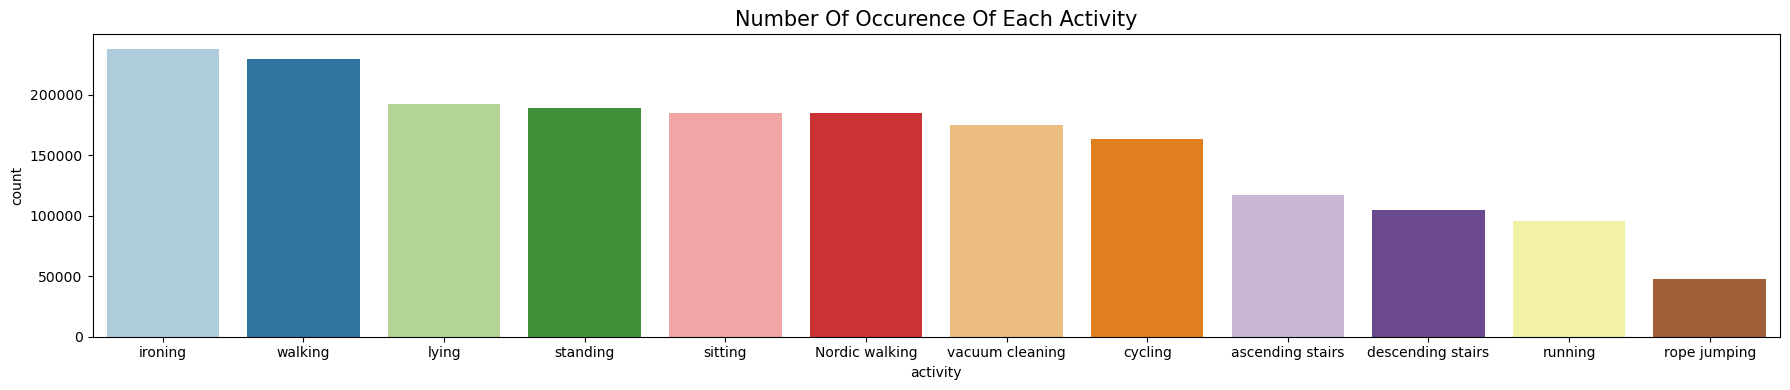

In [19]:
plt.figure(figsize = (18,4))
sns.countplot(x = "activity", data = df, order = df['activity'].value_counts().index, palette = 'Paired')
plt.title("Number Of Occurence Of Each Activity").set_size(15)
plt.tight_layout()
plt.show()

It's evident that our dataset is not well-balanced. Nevertheless, given the substantial size of our dataset, even the least represented activity, such as rope jumping with approximately 5000 observations, still provides a sufficient amount of data to train and test a model effectively.







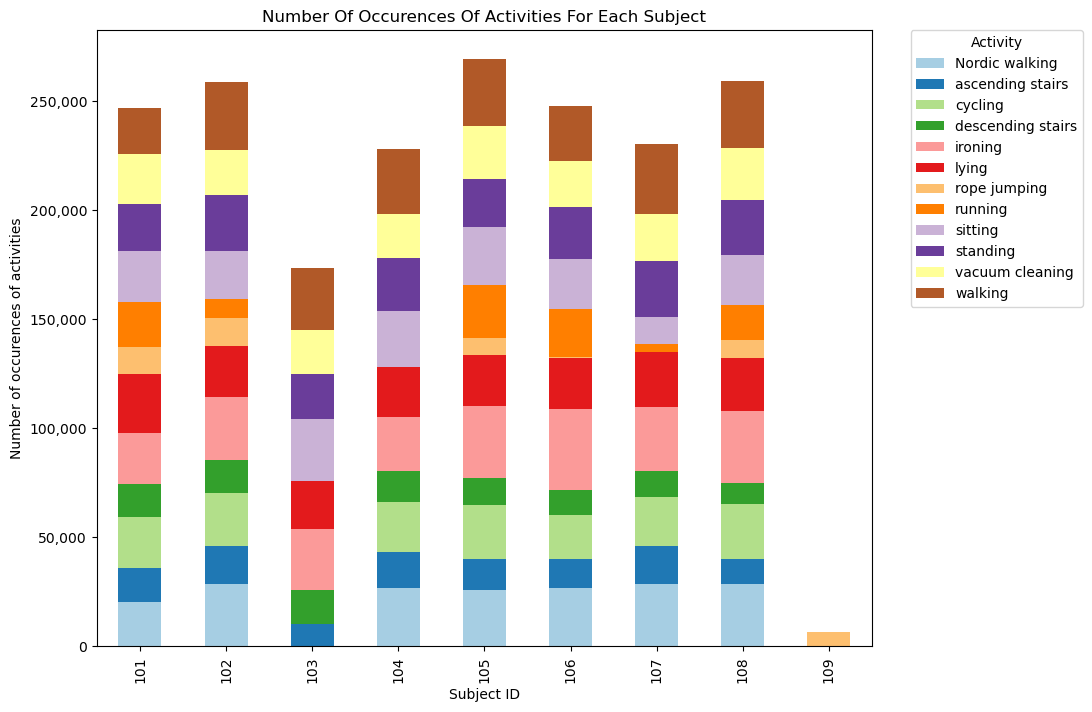

In [20]:
pivot1 = pd.pivot_table(df, values = 'timestamp (s)', index = 'Subject ID', columns = 'activity', aggfunc = 'count')
ax = pivot1.plot(kind = "bar", title = "Figure 1: Subjects' Activity by Number of Time Stamps", figsize = (10, 8),
                 stacked = True, color = sns.color_palette("Paired"))
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_ylabel("Number of occurences of activities")
plt.legend(title = "Activity", bbox_to_anchor = (1.05, 1), borderaxespad = 0)
plt.title("Number Of Occurences Of Activities For Each Subject")
plt.show()

It's noticeable that subjects engaged in varying numbers of activities for different durations of time.

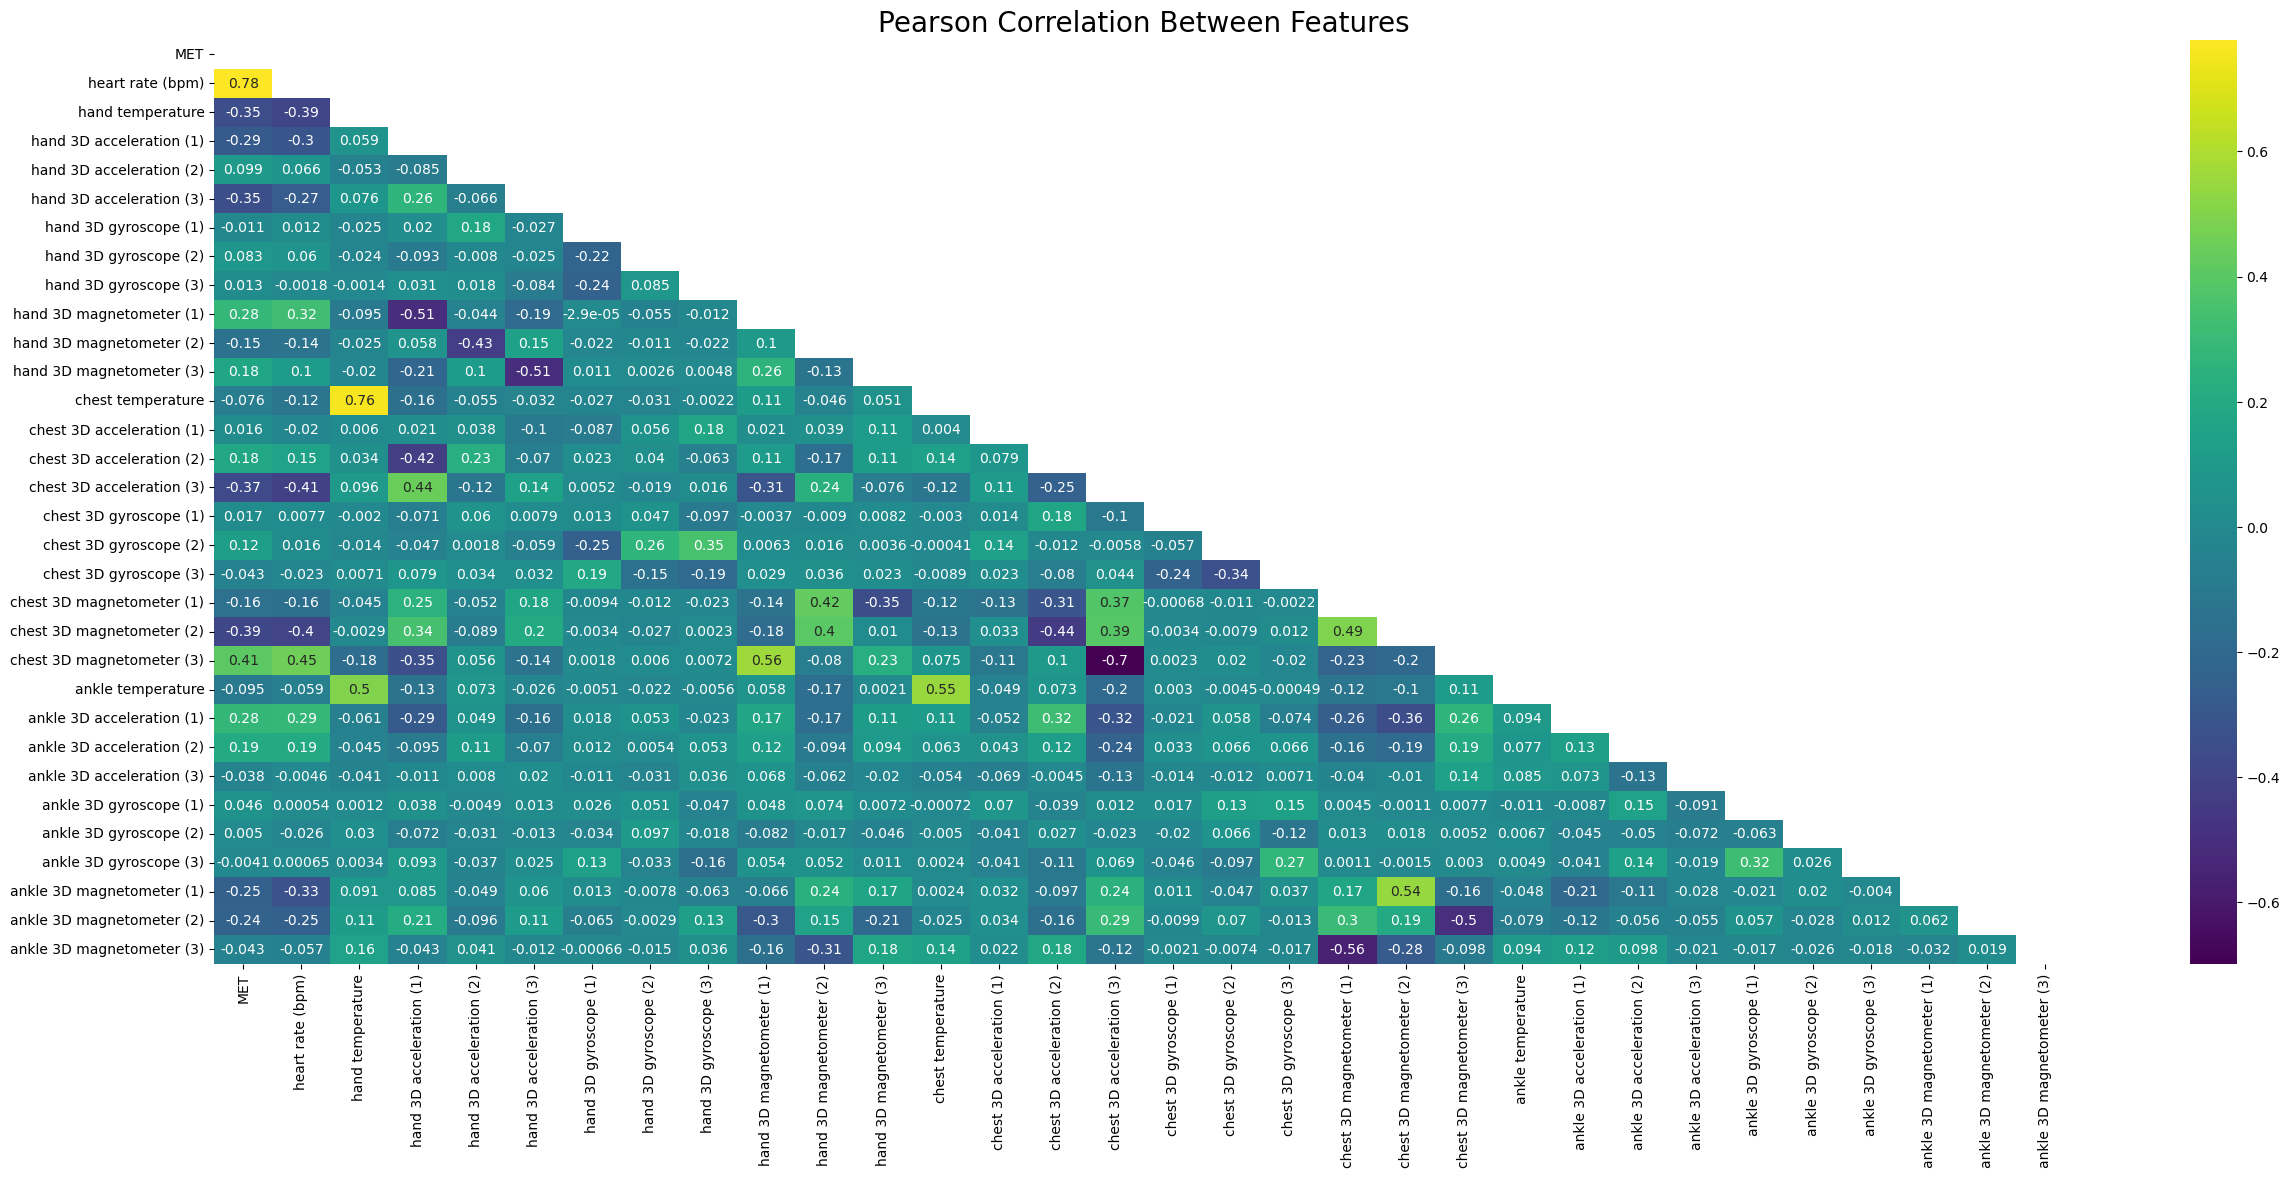

In [21]:
correlation = df.drop(["Subject ID", "timestamp (s)", "activity"], axis = 1).corr()
matrix = np.triu(correlation)
plt.figure(figsize = (30, 12))
sns.heatmap(correlation, annot = True, cmap = "viridis", mask = matrix)
plt.title("Pearson Correlation Between Features").set_size(20)
plt.show()

The heatmap analysis reveals a notable positive correlation between heart rate and MET, alongside a similarly strong positive correlation between chest and hand temperatures. Conversely, there is a pronounced negative correlation between the chest's 3D magnetometer readings and the third acceleration measurement.







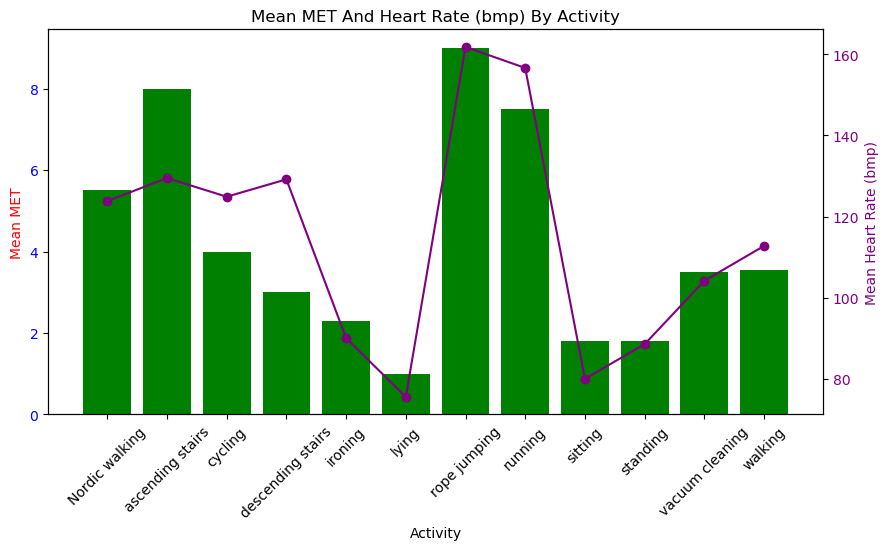

In [22]:
groupedData = df.groupby('activity').agg({'MET': 'mean', 'heart rate (bpm)': 'mean'})
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.set_xlabel('Activity')
ax1.set_ylabel('Mean MET', color = 'red')
ax1.bar(groupedData.index, groupedData['MET'], color = 'green')
ax1.tick_params(axis = 'y', labelcolor = 'blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Heart Rate (bmp)', color = 'purple')
ax2.plot(groupedData.index, groupedData['heart rate (bpm)'], color = 'purple', marker = 'o')
ax2.tick_params(axis = 'y', labelcolor = 'purple')
plt.title('Mean MET And Heart Rate (bmp) By Activity')
ax1.set_xticks(groupedData.index)
ax1.set_xticklabels(groupedData.index, rotation = 45)
plt.show()

This graph represents the average MET and heart rate associated with different activities, highlighting that high-intensity activities such as Nordic walking and running are characterized by elevated METs and heart rates. Conversely, low-intensity activities like sitting demonstrate lower values in both metrics. This effectively demonstrates the varying levels of energy expenditure and cardiovascular effects across different activities.

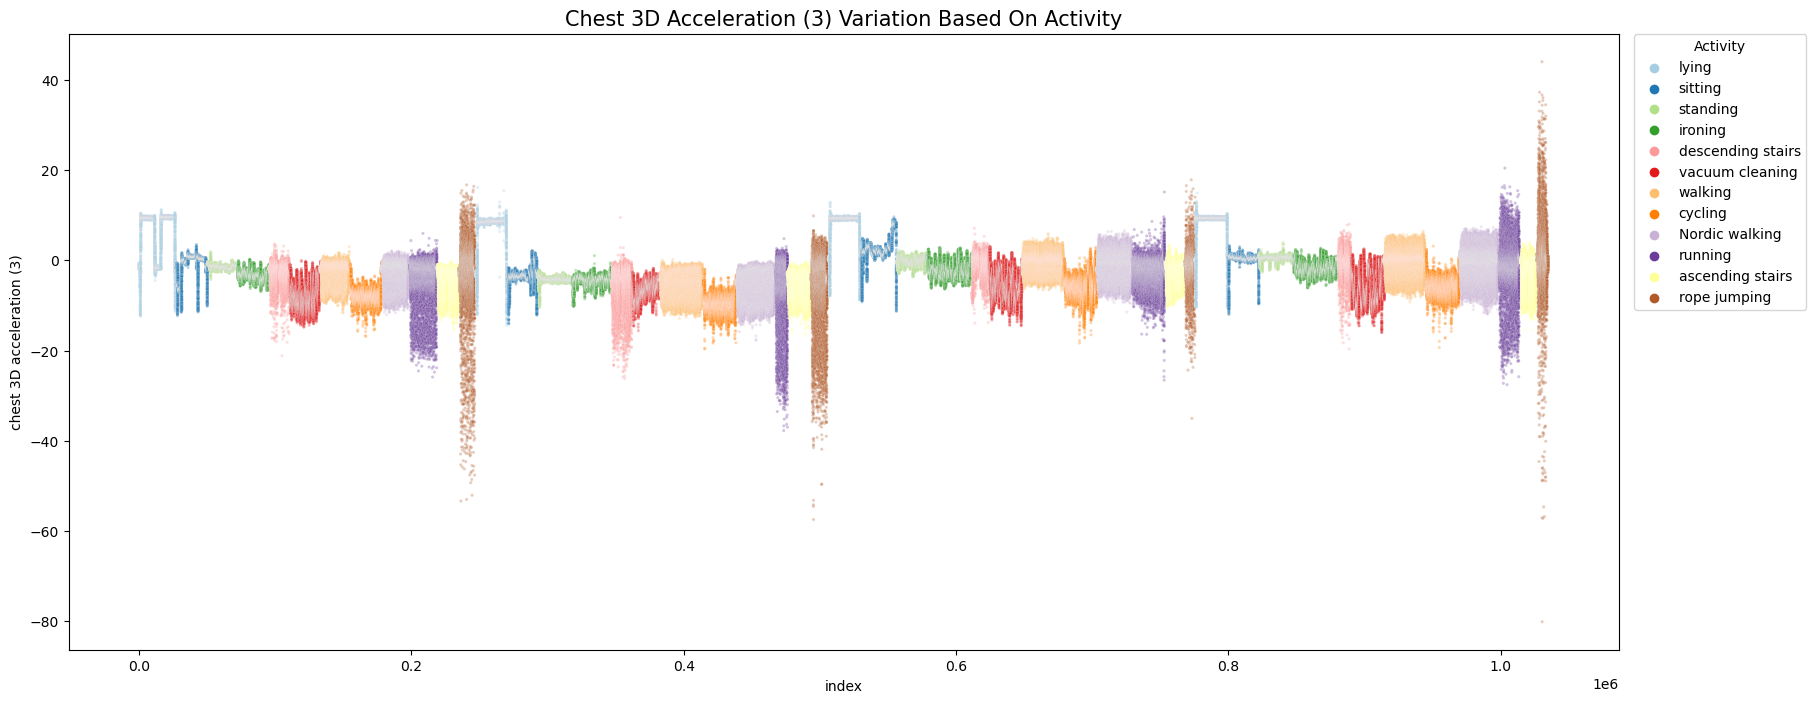

In [23]:
totalActivities = df["activity"].nunique()
allActivitiesSubjects = []
for i in df["Subject ID"].unique():
    if df[df["Subject ID"] == i]["activity"].nunique() == totalActivities:
        if min(df[df["Subject ID"] == i].groupby("activity").count()["Subject ID"]) >= 1000: allActivitiesSubjects.append(i)
temp = df[df["Subject ID"].isin(allActivitiesSubjects)].sort_values(['Subject ID', 'MET', 'activity']).reset_index(drop=True)
plt.figure(figsize = (20, 8))
sns.scatterplot(temp.reset_index(), x = "index", y = "chest 3D acceleration (3)", hue = "activity", s = 5, alpha = .3, palette = "Paired")
plt.legend(title = "Activity", bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.title("Chest 3D Acceleration (3) Variation Based On Activity").set_size(15)
plt.show()

This chart illustrates how the z-axis (vertical) chest acceleration measured by an IMU varies across different activities performed by various subjects. Each activity is represented by a different color, with static activities (lying, sitting, standing) showing minimal variance and dynamic activities (walking, running, rope jumping) exhibiting significant variance. The data highlights how acceleration patterns change in relation to the intensity of movement.







/Users/onurcikla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurcikla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurcikla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/onurcikla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

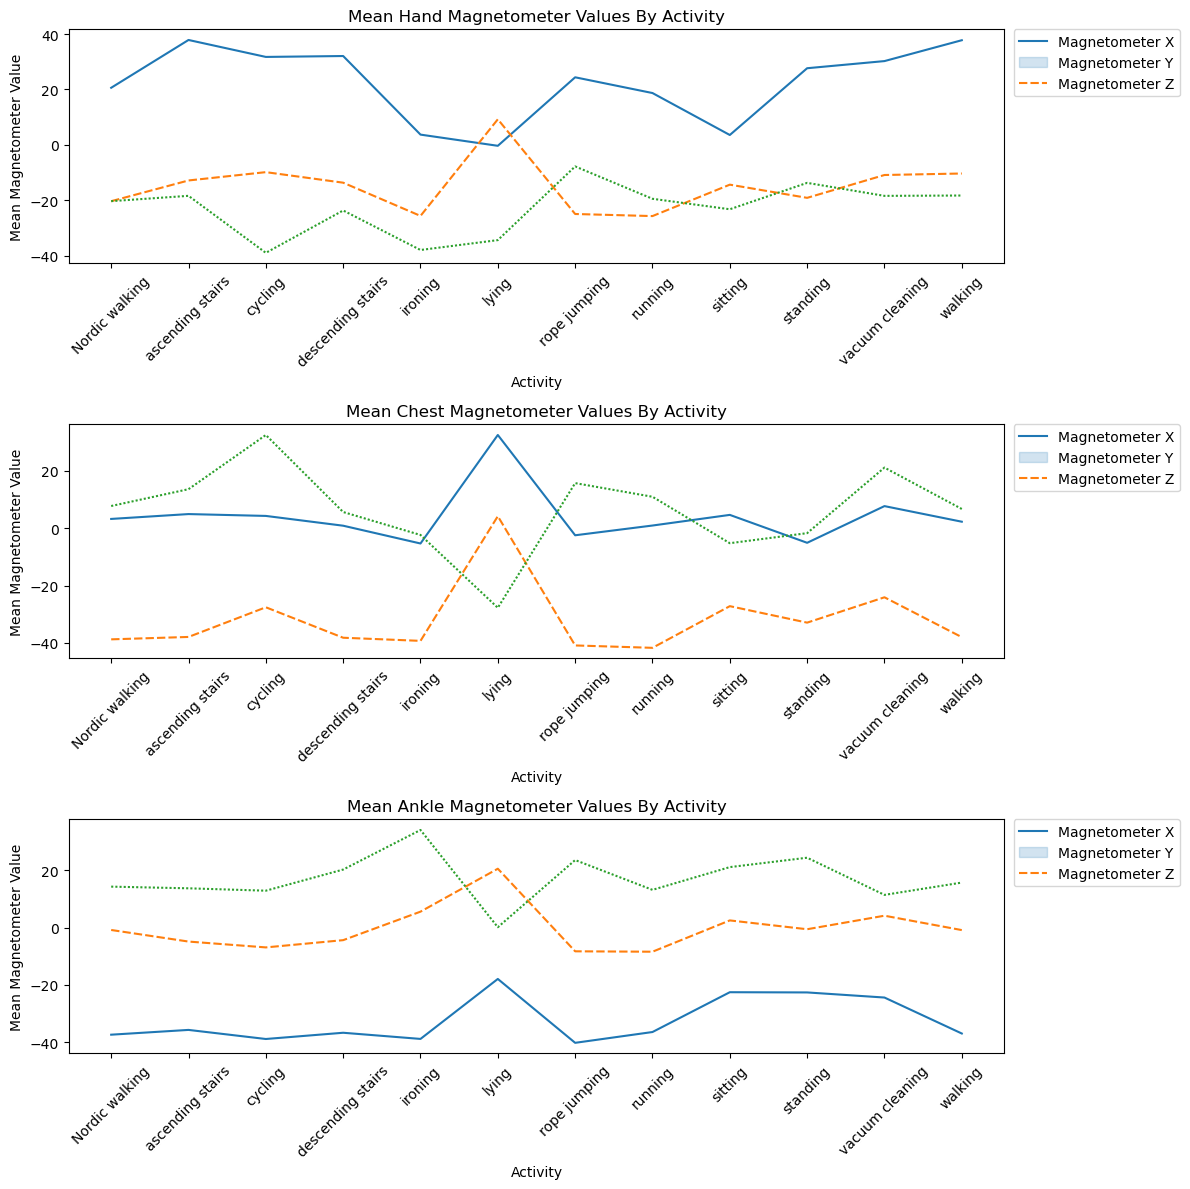

In [24]:
handMagnetometerCols = ['hand 3D magnetometer (1)', 'hand 3D magnetometer (2)', 'hand 3D magnetometer (3)']
chestMagnetometerCols = ['chest 3D magnetometer (1)', 'chest 3D magnetometer (2)', 'chest 3D magnetometer (3)']
ankleMagnetometerCols = ['ankle 3D magnetometer (1)', 'ankle 3D magnetometer (2)', 'ankle 3D magnetometer (3)']
groupedHandMagnetometer = df.groupby('activity')[handMagnetometerCols].mean()
groupedChestMagnetometer = df.groupby('activity')[chestMagnetometerCols].mean()
groupedAnkleMagnetometer = df.groupby('activity')[ankleMagnetometerCols].mean()
plt.figure(figsize = (12, 12))
plt.subplot(3, 1, 1)
sns.lineplot(data = groupedHandMagnetometer)
plt.title('Mean Hand Magnetometer Values By Activity')
plt.xlabel('Activity')
plt.ylabel('Mean Magnetometer Value')
plt.legend(labels = ['Magnetometer X', 'Magnetometer Y', 'Magnetometer Z'], bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.xticks(rotation = 45)
plt.subplot(3, 1, 2)
sns.lineplot(data = groupedChestMagnetometer)
plt.title('Mean Chest Magnetometer Values By Activity')
plt.xlabel('Activity')
plt.ylabel('Mean Magnetometer Value')
plt.legend(labels = ['Magnetometer X', 'Magnetometer Y', 'Magnetometer Z'], bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.xticks(rotation = 45)
plt.subplot(3, 1, 3)
sns.lineplot(data = groupedAnkleMagnetometer)
plt.title('Mean Ankle Magnetometer Values By Activity')
plt.xlabel('Activity')
plt.ylabel('Mean Magnetometer Value')
plt.legend(labels = ['Magnetometer X', 'Magnetometer Y', 'Magnetometer Z'], bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

The line graphs display the average magnetometer measurements taken from the hand, chest, and ankle across different activities. The most pronounced variations are observed during rope jumping and running, primarily at the hand and ankle, owing to vigorous body movements. The chest measurements remain relatively consistent across activities, but show noticeable deviations during rope jumping, reflecting the body's dynamic motion. In contrast, Z-axis readings tend to be lower for static activities like sitting and lying, regardless of the body part being measured, while dynamic activities exhibit higher variability. This variability makes them useful for distinguishing between activity types based on body orientation and motion patterns.







#  4 - Testing and Evaluating the Model














In this phase of our analysis, our primary focus is on assessing and validating the predictive models we've developed using comprehensive data from nine individuals participating in various physical exercises, all monitored by the Colibri Wireless device. Our objective is to enhance the accuracy of predicting specific physical activities through the analysis of IMU readings, ultimately improving the automated activity detection feature of our product.

We have carefully chosen the most relevant variables to include in our model, excluding those with limited value, in order to optimize the model's relevance and effectiveness. The model's evaluation will encompass a thorough examination of its statistical accuracy and practical applicability in real-world scenarios. Our ultimate aim is to extract actionable insights that can lead to further enhancements of the Colibri Wireless device. This approach underscores our commitment to leveraging the power of data science to enhance our product, ensuring that the insights gained from our model drive significant improvements in user experience and solidify our competitive position in the market.

# 4.1-) Linear Regression

We are taking an unconventional approach by employing linear regression for the purpose of categorizing various physical activities. This approach stands out because, traditionally, classification models are utilized for such tasks. In our scenario, linear regression will be utilized to forecast MET values using IMU readings as input.

Our methodology comprises two principal phases. Firstly, we will employ linear regression to anticipate MET values. This initial step primarily revolves around assessing the effectiveness of the chosen physiological variables in estimating the energy expenditure for different activities. Given that linear regression is not typically employed for classification purposes, the anticipated MET values will act as a transitional component in the second phase of our analysis.

In the second phase, we will transform the regression problem into a classification task by associating the anticipated MET values with specific physical activities. This association will be determined based on the proximity of each anticipated MET value to the standard MET values linked to various activities. Essentially, for each anticipated MET value, we will identify the closest standard MET value associated with an activity, thereby classifying the physical activity.

In [25]:
combinedActivityMET = {1: 'lying, watching TV', 1.8: 'sitting, standing, computer work, car driving', 3.55: 'walking', 7.5: 'running, playing soccer', 4: 'cycling',
                       5.5: 'Nordic walking', 8: 'ascending stairs', 3: 'descending stairs', 3.5: 'vacuum cleaning, house cleaning', 2.3: 'ironing, folding laundry',
                       9: 'rope jumping'}

Merging activities that share identical MET values.

In [26]:
X = df.drop(["Subject ID", "timestamp (s)", "activity", "MET"], axis = 1)
y = df["MET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)

Dividing the dataset into training and testing sets with a 70% to 30% ratio.

In [27]:
standardScaler = StandardScaler()
X_train_scaled = standardScaler.fit_transform(X_train)
X_test_scaled = standardScaler.transform(X_test)

The StandardScaler applied in Linear Regression serves to normalize features, centering them around a mean of zero and scaling them to have unit variance. This process is instrumental in improving model performance as it prevents any bias towards features with larger scales and promotes quicker convergence of the algorithm. While particularly beneficial for features that follow a Gaussian distribution, employing the StandardScaler is crucial for upholding model consistency and enhancing interpretability within the context of Linear Regression.







In [28]:
linearRegression = LinearRegression()
linearRegression.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
linRegPredictions = linearRegression.predict(X_test_scaled)

In [30]:
RMSE = mean_squared_error(y_test, linRegPredictions)
R_squared = r2_score(y_test, linRegPredictions)
print(f"RMSE: {RMSE}")
print(f"R^2: {R_squared}")

RMSE: 1.5305447139180737
R^2: 0.6641754921408901


In [31]:
def closest(number, array):
    current = array[0]
    for index in range (len(array)):
        if abs(number - array[index]) < abs(number - current): current = array[index]
    return current

The function mentioned above determines the closest standard MET value to a predicted MET value within an array, effectively categorizing the physical activity by its metabolic equivalent.

In [32]:
uniqueMETs = list(combinedActivityMET.keys())
linRegPredictionsConverged = []
for i in linRegPredictions: linRegPredictionsConverged.append(closest(i, uniqueMETs))

In [33]:
linRegPredictionsConvergedLabels = [combinedActivityMET[i] for i in linRegPredictionsConverged]
y_test_labels = pd.Series([combinedActivityMET[i] for i in y_test])

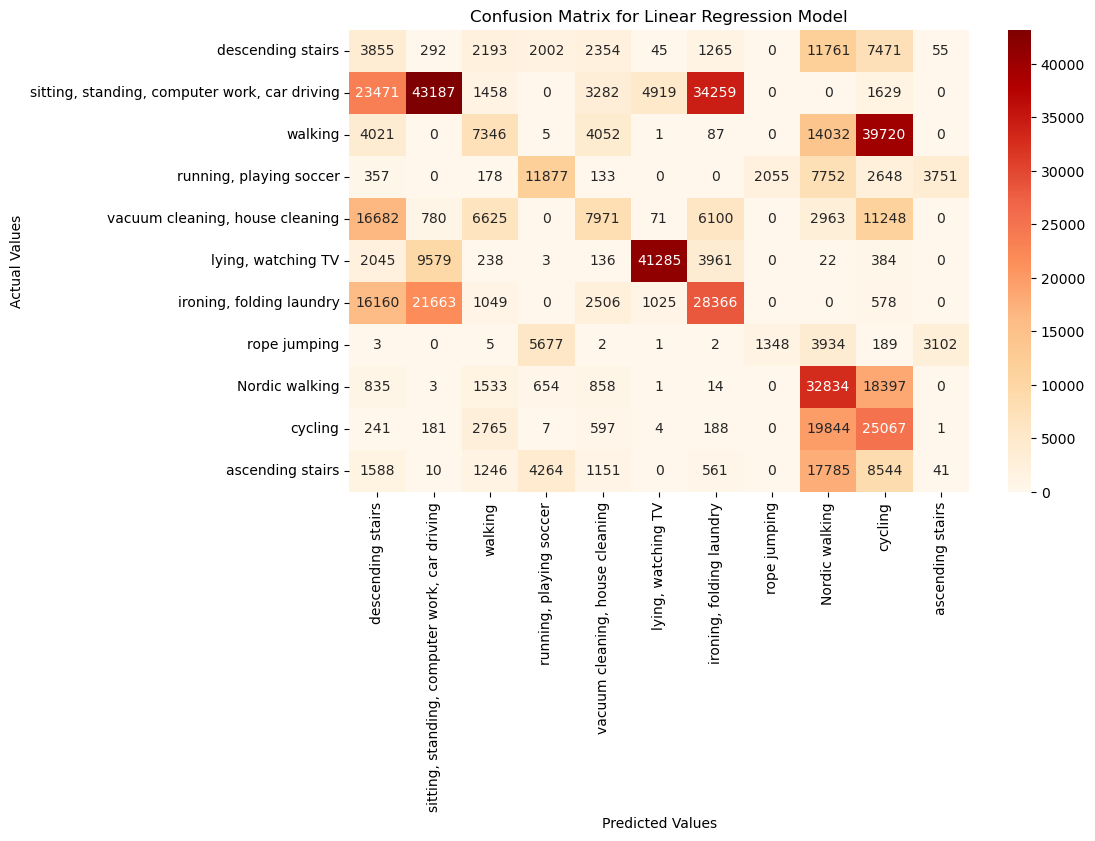

In [34]:
unique_labels = y_test_labels.unique()
confusion_matrix_lr = confusion_matrix(y_test_labels, linRegPredictionsConvergedLabels, labels=unique_labels)
confusion_matrix_df = pd.DataFrame(confusion_matrix_lr, index=unique_labels, columns=unique_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap="OrRd", fmt='g')
plt.title('Confusion Matrix for Linear Regression Model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

The confusion matrix generated when applying a linear regression model to a classification task reveals significant misclassifications across various activities, indicating a poor fit for the dataset. Notably, activities with similar MET profiles, such as 'sitting, standing, computer work, car driving,' and 'ironing, folding laundry,' are frequently mistaken for one another. This inadequacy arises from the use of linear regression, which is designed for continuous variable prediction, in a categorical problem. Linear regression lacks the capability to distinguish discrete class boundaries and does not provide class membership probabilities, which are essential for classification tasks. Moreover, its loss function is not tailored to minimize classification errors. Consequently, the model's performance is inherently compromised, underscoring the necessity for genuine classification algorithms like logistic regression or decision trees, which are better suited to handle discrete activity categories and align more effectively with the nature of classification problems.







In [35]:
coefficientDf = pd.DataFrame(linearRegression.coef_, X_train.columns, columns = ["Coefficient"]).sort_values("Coefficient", ascending = False)

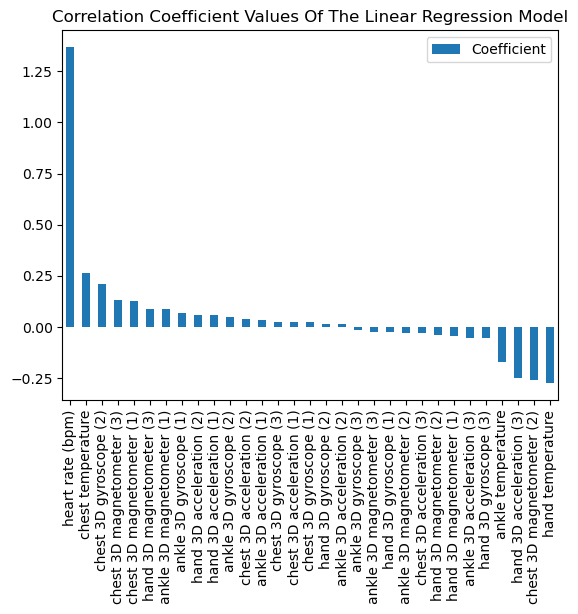

In [36]:
coefficientDf.plot.bar()
plt.title("Correlation Coefficient Values Of The Linear Regression Model")
plt.show()


The analysis of correlation coefficients within the linear regression model reveals a diverse impact of both physiological and movement-based predictors on MET values. Notably, heart rate (bpm) emerges as the most influential predictor, demonstrating a robust positive correlation. Following this, there are moderate positive correlations with specific accelerometer and gyroscope readings, particularly those from the chest sensor. Conversely, temperature measurements obtained from the hand, ankle, and chest sensors exhibit inverse correlations with MET values, implying that MET values decrease as temperature rises. However, the majority of the predictors exhibit negligible correlations, suggesting a limited linear relationship with MET values. These findings may indicate a potential misalignment of the model with the intricacies of the data, which could potentially explain the difficulties encountered in accurately classifying activities based on MET values.

In [37]:
lowCoefficients = coefficientDf[abs(coefficientDf["Coefficient"]) < .03]

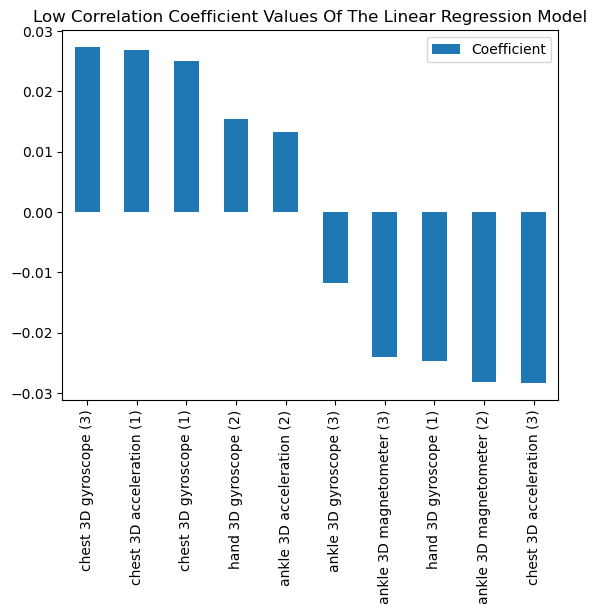

In [38]:
lowCoefficients.plot.bar()
plt.title("Low Correlation Coefficient Values Of The Linear Regression Model")
plt.show()

In [39]:
X = df.drop(["Subject ID", "timestamp (s)", "activity", "MET"], axis = 1)
y = df["activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)

# 4.2-) Random Forest Classifier

Moving forward, we will utilize the Random Forest classifier, a potent ensemble learning approach, to examine our dataset, which is characterized by its multifaceted attributes and possible non-linear variable interactions. This methodology involves building multiple decision trees and combining their results to counteract overfitting and improve predictive accuracy, making it particularly suitable for our complex dataset. By harnessing Random Forest's resilience to over-specification, our objective is to capture intricate patterns within the data and extract valuable insights. Additional information regarding model evaluation and result interpretation will be provided.

In [40]:
y = df["activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)

In [41]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

The code snippet you've provided is related to the implementation of a Random Forest Classifier using a machine learning library, presumably Python's scikit-learn. This type of classifier is a powerful tool in predictive analytics and is used in a variety of applications

In [42]:
randomForestPredictions = randomForestClassifier.predict(X_test)

In [43]:
print(classification_report(y_test, randomForestPredictions))

                   precision    recall  f1-score   support

   Nordic walking       1.00      1.00      1.00     55129
 ascending stairs       1.00      1.00      1.00     35190
          cycling       1.00      1.00      1.00     48895
descending stairs       1.00      1.00      1.00     31293
          ironing       1.00      1.00      1.00     71347
            lying       1.00      1.00      1.00     57653
     rope jumping       1.00      1.00      1.00     14263
          running       1.00      1.00      1.00     28751
          sitting       1.00      1.00      1.00     55516
         standing       1.00      1.00      1.00     56689
  vacuum cleaning       1.00      1.00      1.00     52440
          walking       1.00      1.00      1.00     69264

         accuracy                           1.00    576430
        macro avg       1.00      1.00      1.00    576430
     weighted avg       1.00      1.00      1.00    576430



During the analysis of our dataset using the Random Forest model, we have noted a remarkable level of classification accuracy. The model exhibits exceptional performance in terms of precision, recall, and F1-score metrics across different activity classes. These results indicate that the model is finely tuned and proficient in capturing the underlying patterns within the data.

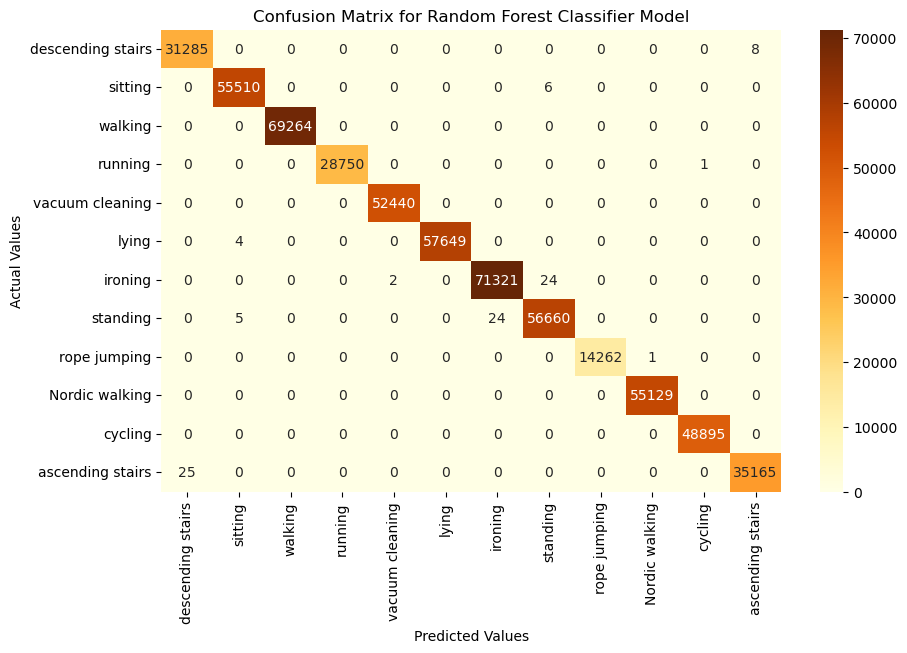

In [47]:
unique_labels_rf = y_test.unique()
confusion_matrix_rf = confusion_matrix(y_test, randomForestPredictions, labels=unique_labels_rf)
confusion_matrix_df_rf = pd.DataFrame(confusion_matrix_rf, index=unique_labels_rf, columns=unique_labels_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix_df_rf, annot=True, cmap="YlOrBr", fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

The confusion matrix for the classification model showcases a robust predictive accuracy, evident by the high values along the matrix diagonal, indicating that most activities have been correctly classified. Minor misclassifications are observed primarily between activities that share similarities, such as 'lying' with 'ironing' and 'standing,' as well as 'ascending stairs' with 'descending stairs.' Nevertheless, these instances of misclassification are relatively infrequent, and the model demonstrates an overall accurate ability to distinguish between the different activities.







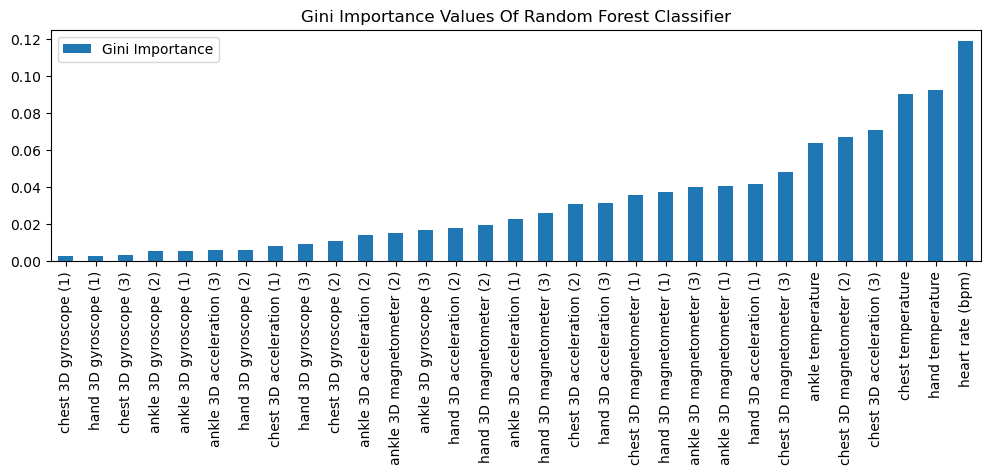

In [48]:
feats = {}
for feature, importance in zip(X.columns, randomForestClassifier.feature_importances_): feats[feature] = importance
giniImportance = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini Importance"})
giniImportance.sort_values(by = "Gini Importance").plot(kind = "bar", rot = 90, figsize = (12, 3))
plt.title("Gini Importance Values Of Random Forest Classifier")
plt.show()

The bar chart illustrates the Gini importance of various sensor-derived features within a machine learning model, emphasizing the significance of features such as heart rate, chest temperature, and ankle temperature in shaping the model's predictions. Conversely, certain gyroscope and acceleration features from the hand and ankle exhibit lower importance. This feature ranking provides valuable guidance for model optimization, as it enables the prioritization of the most influential predictors, ultimately enhancing the model's performance.

# 5-) Conclusion

In our endeavor to elevate the market presence of the Colibri Wireless unit, we embarked on an in-depth data analysis journey. This involved analyzing a rich dataset from nine individuals engaged in varied physical activities. Our exploratory data analysis was crucial in revealing how these activities correlate with the readings from the Inertial Measurement Units (IMUs).

We meticulously processed and visualized the data, leading to the deployment of two distinct machine learning models: linear regression and a random forest classifier. Interestingly, while linear regression is not typically used for classification tasks, it offered initial insights into our data. However, its predictive accuracy was limited. The random forest classifier, in contrast, excelled in its performance, adeptly navigating the complexities of our dataset.

Our research into the predictive capabilities of IMU readings, guided by the linear regression model's coefficients and the random forest classifier's Gini importance values, culminated in a significant recommendation. We noted that attributes with lower Gini importance scores had less impact on prediction accuracy. Hence, to amplify the efficacy of the Colibri Wireless unit, we suggest honing the precision of the IMU sensors, particularly those attributes scoring low on Gini importance. Enhancing the precision of these sensors will directly improve activity prediction accuracy, a key differentiator for our product in a competitive arena.

We strongly advise that the refinement of the Colibri Wireless unit be guided by the insights from the random forest model, given its demonstrated reliability and effectiveness. Such a strategic enhancement will not only boost the unit's performance but also underscore our commitment to innovation and customer satisfaction. Integrating our product development with the advanced insights from machine learning techniques positions Trivisio as a leader in the IMU technology sector.

In summary, our comprehensive data analysis and application of machine learning have affirmed the Colibri Wireless unit's capabilities and shed light on avenues for its advancement. The suggested improvements in sensor precision are poised to significantly increase the product's value, ensuring that Trivisio’s Colibri Wireless unit is recognized as the premier choice for accurate and reliable physical activity monitoring.

Submission length is 2870